<a href="https://colab.research.google.com/github/SDS-AAU/IntroStat/blob/master/Notebooks/AS_S4_korrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #pandas (som næsten altid)
import numpy as np #numpy hvis der skal laves mere komplekse beregninger
import seaborn as sns #seaborn til plots
 
from matplotlib import pyplot as plt #plot control
 
sns.set() #plot style
 
 
from IPython.display import HTML #Youtube embed

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Anvendt statistik S2 - Hands-on

Her kommer vi til at se på et datasæt af pingviner (man kan læse mere om data her: https://github.com/allisonhorst/palmerpenguins)

![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

Hvis du har 2 minutter og vil vide mere om disse pingviner, så er der en kort video om dem...

## Bivariat analyse
Ind til videre har vi som udgangspunkt bearbejdet enkelte variable som udgangspunkt for analyse og visualisering. I dette afsnit vil i blive introduceret for *bivariat* analyse, hvor man undersøger sammenhængen mellem to variable i et datasæt. Her vil i, blandt andet, blive introduceret for *kovarians* og *Pearson's korrelations koefficient*.

---

Som det første vil i blive introduceret for, hvordan man visualiserer fordelingen mellem to variable. Denne visualisering opstilles i en graf ved at sætte en variabel på x-aksen og en variabel på y-aksen. Her opdeles datasættets observationer i grafen, alt efter hvordan de placerer sig i mellem variablen x og variablen y. Dette kaldes et *scatter plot*

In [ ]:
# Vi åbner vores penvin data direkte fra github
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# her sletter vi alle rækker, hvor der mangler data for en eller anden variabel

penguins = penguins.dropna()

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 30.9+ KB


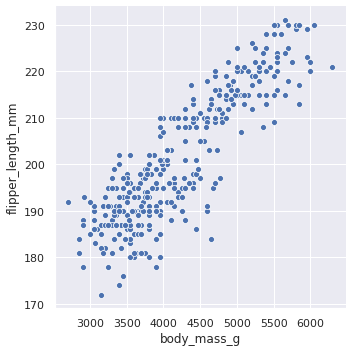

In [ ]:
# Med Seaborn
sns.relplot(x="body_mass_g", y="flipper_length_mm", data=penguins);

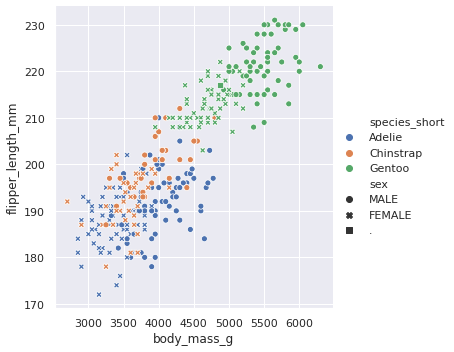

In [ ]:
# Seaborn does it fancy
sns.relplot(x="body_mass_g", y="flipper_length_mm", hue="species_short", style="sex", data=penguins)

In [ ]:
# (avanceret) stats import
import scipy.stats as stats

In [ ]:
penguins['flipper_length_normalized'] = stats.zscore(penguins.flipper_length_mm)

In [ ]:
penguins['body_mass_normalized']  = stats.zscore(penguins.body_mass_g)

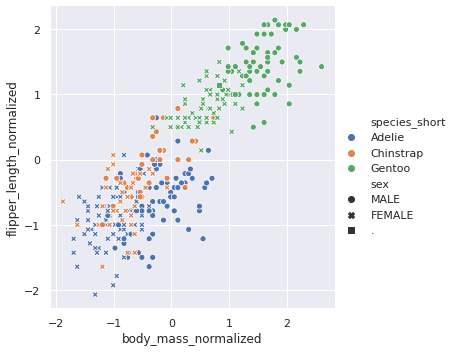

In [ ]:
sns.relplot(x = 'body_mass_normalized', y = 'flipper_length_normalized', hue="species_short", style="sex", data=penguins )

#### Kovarians
Kovarians er et mål for sammenhængen mellem to skaleringsafhængige variable - altså, hvor meget en variabel vil ændres når en anden variabel ændres.  

In [ ]:
# Kovarians matrix med pandas
penguins[['body_mass_g', 'flipper_length_mm']].cov()

,body_mass_g,flipper_length_mm
body_mass_g,647761.194952,9854.668816
flipper_length_mm,9854.668816,196.621397


In [ ]:
# Kovarians
penguins.body_mass_g.cov(penguins.flipper_length_mm)

9854.668815522105

#### Korrelations koefficient (Pearson's R)
Eftersom kovarians er udregnet med baggrund i de givne variables skalering, giver det ikke analytisk mening at udlede indsigt fra kovariansen alene. Man anvender derfor korrelations koefficienten til at standardisere værdierne i variablene. 

Korrelations koefficienten vil altid have en værdi mellem -1 og 1. Hvis koefficienten er tæt på 1 vil der være en *positiv* sammenhæng mellem x og y (når x stiger, stiger y også). Hvis koefficienten er tæt på -1 vil der være en *negativ* sammenhæng mellem x og y (når x stiger, falder y). Værdier tæt på 0 indikerer at der er lav eller ingen sammenhæng mellem x og y (når x stiger, gør y hvad den vil). 

In [ ]:
# Pandas .corr() kan anvendes til at vurdere korrelationen mellem samtlige numeriske variable i et datasæt. 
penguins.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


In [ ]:
# Korrelations matrix med pandas
# Note: Der er forskellige måder at udregne korrelation, hvor Pearson's er den mest udbredte. 
# Pandas .corr() har pearson som default, men kan ændres efter behov.
penguins[['body_mass_g', 'flipper_length_mm']].corr(method='pearson')

,body_mass_g,flipper_length_mm
body_mass_g,1.000000,0.873211
flipper_length_mm,0.873211,1.000000


In [ ]:
# Pearson's R (korrelations koefficient)
penguins.body_mass_g.corr(penguins.flipper_length_mm)

0.8732109665376445

In [ ]:
# Ud med de normaliserede igen
penguins = penguins.drop(['body_mass_normalized', 'flipper_length_normalized'], axis = 'columns')

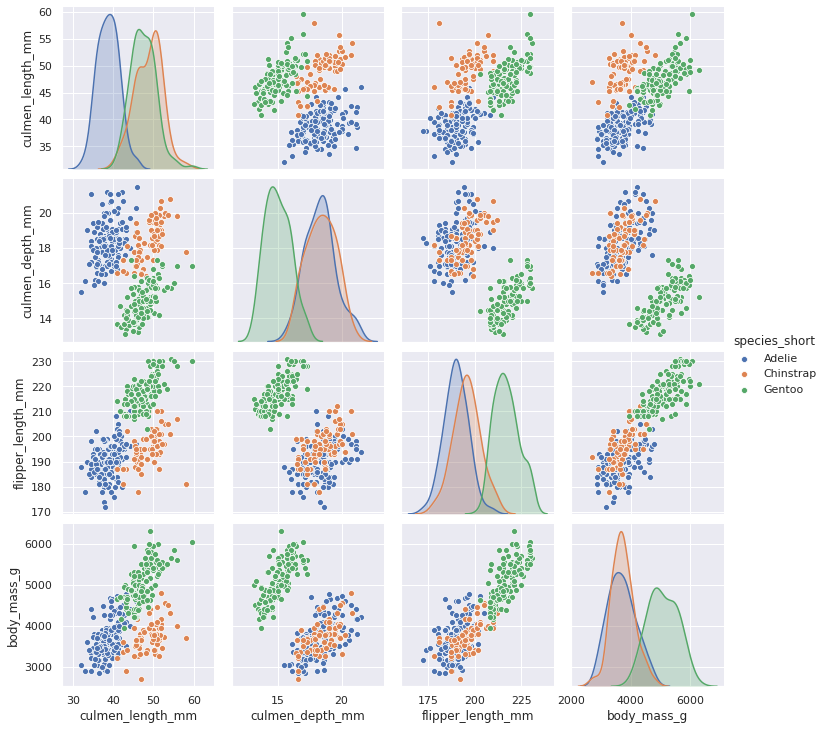

In [ ]:
sns.pairplot(penguins, hue="species_short")

### Klasseøvelse
Udregn korrelations koefficient for næblængde ift. næbdybde for samtlige observationer og for hver af de 3 racer - Visualiser det i et scatterplot. 

##### Løsning 

###### Svar 1

In [ ]:
penguins.culmen_length_mm.corr(penguins.culmen_depth_mm)

-0.2286399780569594

###### Svar 2

In [ ]:
penguins.groupby('species_short').culmen_length_mm.corr(penguins.culmen_depth_mm)

species_short
Adelie       0.385813
Chinstrap    0.653536
Gentoo       0.644085
Name: culmen_length_mm, dtype: float64

###### Svar 3

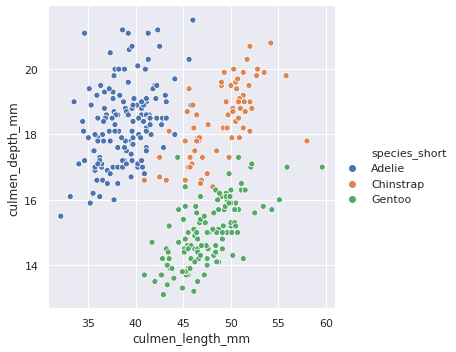

In [ ]:
sns.relplot(x="culmen_length_mm", y="culmen_depth_mm", hue="species_short", data=penguins);